Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
import numpy as np

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split    
from sklearn.metrics import confusion_matrix
from sklearn import datasets

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Carregar o dataset MNIST
digits = datasets.load_digits(n_class=10)

images=digits.images
targets=digits.target
images=images.reshape(len(images),8*8)

In [4]:
X = digits.data
y = digits.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2)

In [5]:
# Definir o grid de parâmetros para busca
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar o classificador
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Prever as classes para o conjunto de teste com o melhor modelo encontrado
y_pred = grid_search.best_estimator_.predict(X_test)

/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:27:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:27:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:27:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:27:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:27:31] WARNING

Melhores parâmetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Precisão com os melhores parâmetros: 0.9672861014324429


In [10]:
# Melhor combinação de parâmetros
print("Melhores parâmetros encontrados:", grid_search.best_params_)

# Imprimir a precisão do XGBClassifier com os melhores parâmetros
print("Precisão com os melhores parâmetros:", grid_search.best_score_)

# Imprimir a precisão da Decision Tree
print("Precisão:", grid_search.score(X_test, y_test))

acuracia = accuracy_score(y_test, y_pred)
print("Acurácia: %.2f%%" % (acuracia * 100.0))

Melhores parâmetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Precisão com os melhores parâmetros: 0.9672861014324429
Precisão: 0.9722222222222222
Acurácia: 97.22%


In [7]:
confusion = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão\n')
print(confusion)

Matriz de Confusão

[[31  0  0  0  0  0  0  0  1  0]
 [ 0 37  0  1  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  1 26  0  1  0]
 [ 0  0  0  0  1  0  0 39  0  0]
 [ 0  1  0  1  0  0  0  0 37  0]
 [ 0  0  0  1  0  0  0  0  0 41]]


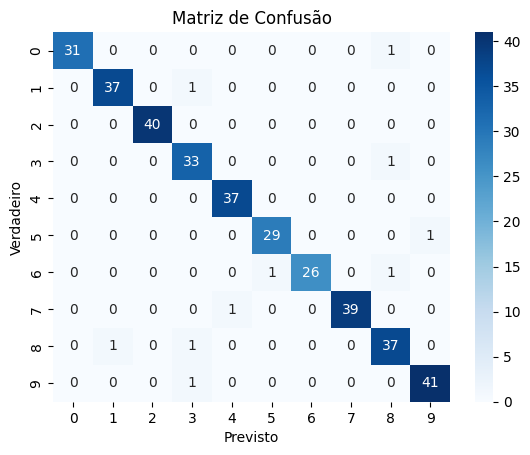

In [8]:
#Mostrar como heatmap
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()